In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 35.5MB/s]


In [3]:
data = open('./sonnets.txt').read()

In [4]:
corpus = data.lower().split("\n")

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [6]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

In [7]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [8]:
### START CODE HERE
model = Sequential()
model.add(Embedding(total_words, 125, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(175, return_sequences = True)))
model.add(Dropout(0.25))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 125)           401375    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 350)           421400    
_________________________________________________________________
dropout (Dropout)            (None, 10, 350)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               180400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,322,146
Trainable params: 6,322,146
Non-trainable params: 0
______________________________________________

In [10]:
history = model.fit(predictors, label, epochs=110, verbose=2)

Epoch 1/110
484/484 - 18s - loss: 6.8995 - accuracy: 0.0223
Epoch 2/110
484/484 - 8s - loss: 6.5052 - accuracy: 0.0230
Epoch 3/110
484/484 - 8s - loss: 6.4063 - accuracy: 0.0256
Epoch 4/110
484/484 - 8s - loss: 6.2850 - accuracy: 0.0293
Epoch 5/110
484/484 - 8s - loss: 6.1977 - accuracy: 0.0300
Epoch 6/110
484/484 - 8s - loss: 6.1253 - accuracy: 0.0368
Epoch 7/110
484/484 - 8s - loss: 6.0567 - accuracy: 0.0411
Epoch 8/110
484/484 - 8s - loss: 5.9920 - accuracy: 0.0437
Epoch 9/110
484/484 - 8s - loss: 5.9237 - accuracy: 0.0483
Epoch 10/110
484/484 - 8s - loss: 5.8416 - accuracy: 0.0526
Epoch 11/110
484/484 - 8s - loss: 5.7539 - accuracy: 0.0567
Epoch 12/110
484/484 - 8s - loss: 5.6547 - accuracy: 0.0621
Epoch 13/110
484/484 - 8s - loss: 5.5582 - accuracy: 0.0653
Epoch 14/110
484/484 - 8s - loss: 5.4555 - accuracy: 0.0730
Epoch 15/110
484/484 - 8s - loss: 5.3593 - accuracy: 0.0758
Epoch 16/110
484/484 - 8s - loss: 5.2593 - accuracy: 0.0818
Epoch 17/110
484/484 - 8s - loss: 5.1602 - accur

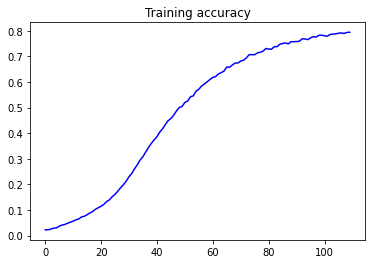

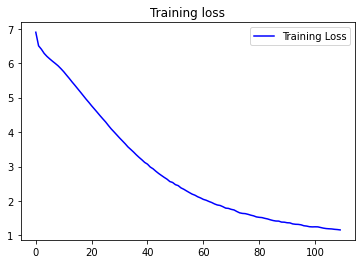

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [12]:
seed_text = "The god is watching us as we are doing the prayer"
next_words = 110
  
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted_probs = model.predict(token_list, verbose=0)
  predicted = np.argmax(predicted_probs,axis=1)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

The god is watching us as we are doing the prayer spring or seasons' borrow'd state away increase rolling forsaken forsaken rolling lend thee new dyed dyed out that many fair bright faith so seen his heart smells spent rehearse fled spent level to shown pleasure thee grace their blot thy it must tend tend tend thee back so true due to thee lies be seen make thine gone such thy state to 'will ' move lies give a pride sheds survey ' grew men bide invention of men's 'no might to crave taken appear grow of such good age weeds prove weeds bright pride quite blot to set a sky sounds worn appear hate forth to eye of gone ill
